## Import libs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np
from scipy.optimize import minimize

import package_DBR
from package_LAB import *
from package_DBR import *

## LeadLag

In [2]:
help(LeadLag_RT)

Help on function LeadLag_RT in module package_LAB:

LeadLag_RT(MV, Kp, Tlag, Tlead, Ts, MVLL, PVInit=0, method='EBD')
    The function "FO_RT" needs to be included in a "for or while loop".
    
    • MV: input vector
    • Kp: process gain
    • Tlag: lag time constant [s]
    • Tlead: lead time constant [s]
    • Ts: sampling period [s]
    • MVLL: output vector
    • PVInit: (optional: default value is 0)
    • method: discretisation method (optional: default value is 'EBD')
      EBD: Euler Backward difference
      EFD: Euler Forward difference
      TRAP: Trapezoïdal method
    
    The function "FO_RT" appends a value to the output vector "PV".
    The appended value is obtained from a recurrent equation that depends on the discretisation method.



## Params for Lead-Lag

In [3]:
TSim = 100
Ts = 0.1
N = int(TSim/Ts) + 1

# Path for MV
MVPath = {0: 0, 5: 1, 50: 2, 80: 3, TSim: 3}

t = []
MV = []
MVDelay = []
PV_EBD = []
PV_EFD = []

# Parameters
Kp = 1
Tlead = 1
Tlag = 2
theta = 10

## Simulate Lead-Lag response to steps

(0.0, 100.0)

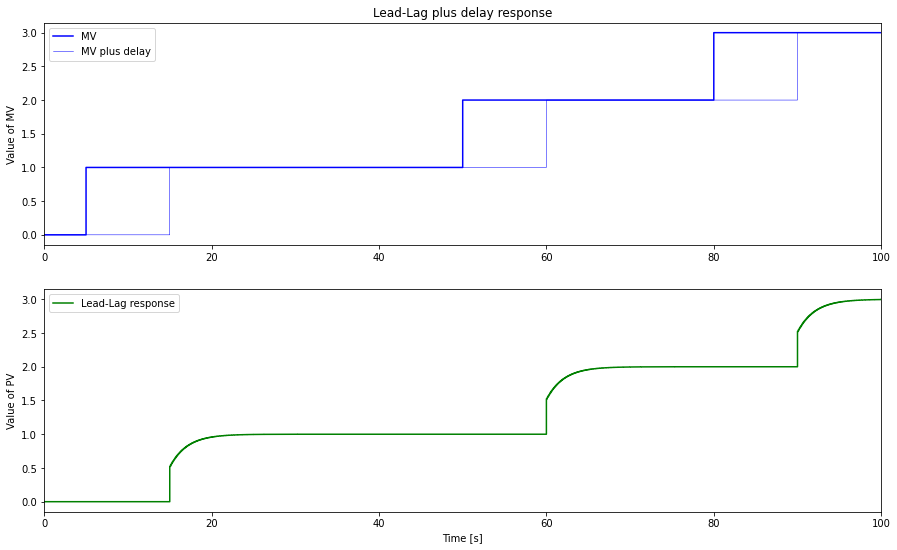

In [4]:
for i in range(0,N):
  t.append(i*Ts)
  SelectPath_RT(MVPath,t,MV)
  Delay_RT(MV,theta,Ts,MVDelay)
  LeadLag_RT(MVDelay,Kp,Tlag,Tlead,Ts,PV_EBD)
  #PV_EBD.append(LeadLag_RT(MVDelay,Kp,Tlag,Tlead,Ts,PV_EBD))
  # LeadLag_RT(MVDelay,Kp,Tlag,Tlead,Ts,PV_EFD,0,'EFD')

plt.figure(figsize = (15,9))

plt.subplot(2,1,1)
plt.step(t,MV,'b-',label='MV',where='post')
plt.step(t,MVDelay,'b-',linewidth=0.5,label='MV plus delay',where='post')
plt.ylabel('Value of MV')
plt.title('Lead-Lag plus delay response')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,PV_EBD,'g-',label='Lead-Lag response',where='post')
# plt.step(t,PV_EFD,'lime',label='Lead-Lag response',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])  

## Lead-Lag with Widgets

In [5]:
def leadLagPlot(Kp, Tlead, Tlag, theta, Ts):
  TSim = 100
  N = int(TSim/Ts) + 1

  t = []
  MV = []
  MVDelay = []
  PV_EBD = []
  PV_EFD = []

  MVPath = {0: 0, 5: 1, 50: 2, 80: 3, TSim: 3}

  for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    Delay_RT(MV,theta,Ts,MVDelay)
    LeadLag_RT(MVDelay,Kp,Tlag,Tlead,Ts,PV_EBD)
    #PV_EBD.append(LeadLag_RT(MVDelay,Kp,Tlag,Tlead,Ts,PV_EBD))

  plt.figure(figsize = (15,9))

  plt.subplot(2,1,1)
  plt.step(t,MV,'b-',label='MV',where='post')
  plt.step(t,MVDelay,'b-',linewidth=0.5,label='MV plus delay',where='post')
  plt.ylabel('Value of MV')
  plt.title('First order plus delay response')
  plt.legend(loc='best')
  plt.xlim([0, TSim])

  plt.subplot(2,1,2)
  plt.step(t,PV_EBD,'g-',label='First order response plus delay (EBD)',where='post')
  plt.ylabel('Value of PV')
  plt.xlabel('Time [s]')
  plt.legend(loc='best')
  plt.xlim([0, TSim]) 

interact(leadLagPlot, Kp = widgets.FloatSlider(value=1,
                                                min=0.1,
                                                max=10.0,
                                                step=0.1),
                    Tlead = widgets.FloatSlider(value=1,
                                                min=0.1,
                                                max=10.0,
                                                step=0.1),
                    Tlag = widgets.FloatSlider(value=1,
                                                min=0.1,
                                                max=10.0,
                                                step=0.1),
                    theta = widgets.FloatSlider(value=10,
                                                min=1,
                                                max=20.0,
                                                step=1),
                    Ts = widgets.FloatSlider(value=1,
                                                min=0.001,
                                                max=1.0,
                                                step=0.001))

interactive(children=(FloatSlider(value=1.0, description='Kp', max=10.0, min=0.1), FloatSlider(value=1.0, desc…

<function __main__.leadLagPlot(Kp, Tlead, Tlag, theta, Ts)>

## PID

In [6]:
help(PID_RT)

Help on function PID_RT in module package_LAB:

PID_RT(PV, SP, MV, Ts, Kc, Ti, Td, alpha, approximationType, PVinit=0, man=False, manMV=[0], FF_MV=[0], FF_MV_init=0, MVmin=0, MVmax=100)
    parameters : 
    • PV : array of all recorded PV values
    • SP : current SP value
    • MV : dict of all recorded MV ({"MV" : [0], "MVp" : [0], "MVi": [0], "MVd": [0], "E" : [0]})
    • Ts : Sample time (seconds)
    • Kc : PID gain
    • Ti : PID Integration time constant
    • Td : PID Derivation time constant
    • alpha : proportional parameter between Td and Tfd
    • approximationType : list of approximation types for integration and derivation (looks like : ["EBD", "TRAP"]), you can choose EBD or TRAP
    • PVinit : initial PV value (useful for simulations, default = 0)
    • man : boolean, true if manual mode is enabled (default = false)
    • manMV : array of manual MV values (default = [0])
    • FF_MV : array of all Feed-Forward MV values (default = [0])
    • FF_MV_init : initial valu

## Set parameters for PID

In [7]:
Kc = 1.1
Ti = 10
Td = 5
alpha = 0.5
discretisation = ["TRAP", "TRAP"]

PV = []
MV = {"MV" : [],
      "MVp" : [],
      "MVi": [], 
      "MVd": [], 
      "E" : []}

Ts = 0.01
TSim = 50

N = int(TSim/Ts)+1

t = []
SP = []
SPPath = {0: 0, 5: 20}

for i in range(0,N):
  PV.append(0)
  t.append(i*Ts)
  SelectPath_RT(SPPath,t,SP)

## Plot step response of PID

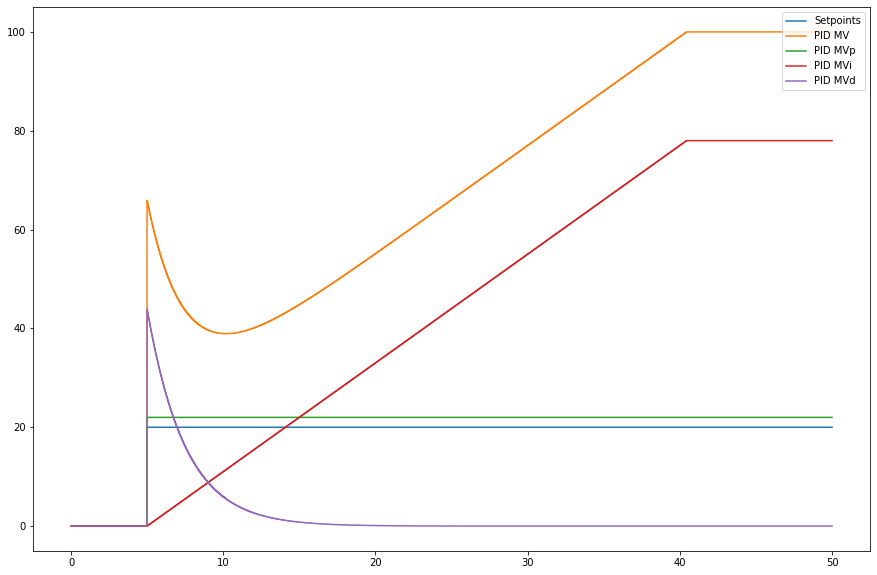

In [8]:


for i in range(0, N):
  PID_RT(PV, SP[i], MV, Ts, Kc, Ti, Td, alpha, discretisation)

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)

plt.step(t, np.array(SP), label='Setpoints')
plt.step(t, np.array(MV["MV"]), label='PID MV')
plt.step(t, np.array(MV["MVp"]), label='PID MVp')
plt.step(t, np.array(MV["MVi"]), label='PID MVi')
plt.step(t, np.array(MV["MVd"]), label='PID MVd')

plt.legend(loc='upper right')



plt.show()

## PID with Widgets

In [9]:
def PIDPlot(Kc, Ti, Td, alpha, Ts):

  discretisation = ["TRAP", "TRAP"]

  PV = []
  MV = {"MV" : [],
        "MVp" : [],
        "MVi": [], 
        "MVd": [], 
        "E" : []}
  TSim = 50

  N = int(TSim/Ts)+1

  t = []
  SP = []
  SPPath = {0: 0, 5: 20}

  for i in range(0,N):
    PV.append(0)
    t.append(i*Ts)
    SelectPath_RT(SPPath,t,SP)

  for i in range(0, N):
    PID_RT(PV, SP[i], MV, Ts, Kc, Ti, Td, alpha, discretisation)

  f = plt.figure()
  f.set_figwidth(15)
  f.set_figheight(10)

  plt.step(t, np.array(SP), label='Setpoints')
  plt.step(t, np.array(MV["MV"]), label='PID MV')
  plt.step(t, np.array(MV["MVp"]), label='PID MVp')
  plt.step(t, np.array(MV["MVi"]), label='PID MVi')
  plt.step(t, np.array(MV["MVd"]), label='PID MVd')

  plt.legend(loc='upper right')



  plt.show()

interact(PIDPlot, Kc = widgets.FloatSlider(value=1.1,
                                                min=0.1,
                                                max=10.0,
                                                step=0.1),
                      Ti = widgets.FloatSlider(value=10,
                                                min=0.1,
                                                max=20.0,
                                                step=0.1),
                      Td = widgets.FloatSlider(value=5,
                                                min=0.1,
                                                max=20.0,
                                                step=0.1),
                    alpha = widgets.FloatSlider(value=0.5,
                                                min=0.01,
                                                max=5,
                                                step=0.01),
                    Ts = widgets.FloatSlider(value=1,
                                                min=0.001,
                                                max=1.0,
                                                step=0.001))

interactive(children=(FloatSlider(value=1.1, description='Kc', max=10.0, min=0.1), FloatSlider(value=10.0, des…

<function __main__.PIDPlot(Kc, Ti, Td, alpha, Ts)>